To tackle the main problem, we are going to perform unsupervised learning, conducting description tasks. 
We will segregate the physicians into different groups, each group fulfilling similar features.
Firstly, we will perform K-Means. This is an algorithm simple to implement, that scales to large data sets and guarantees convergence.

In [1]:
# 1. CLUSTERING GENERAL PREPROCESSING 
# Clustering is an unsupervised learning method which can be used to discover the underlying pattern in the data structure.  
# For example, it can be used to group unlabelled data

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score


df=pd.read_csv('stress_study.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(5).to_html()))




,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
3,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
4,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2


In [2]:

# 1.1 Check whether there are missing values replace those by the mean of each feature

    # chech if there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

print('-------------------x-------------------')
print('-------------------x-------------------')



     # replace missing values in numerical variables by using mean value 
df["Source_of_stress"].fillna(df["Source_of_stress"].mean(), inplace=True)


    # check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
    


ColumnName, DataType, MissingValues
Age , int64 , False
Gender , int64 , False
Sector , int64 , False
Working_same_sector , int64 , False
Specialization , int64 , False
Work_hours , int64 , False
Work_years_span , int64 , False
Patient_per_day , int64 , False
Overtime_work_interest , int64 , False
Overtime_work_paid , int64 , False
Stressed_during_work , int64 , False
Feeling_on_job , int64 , False
Source_of_stress , float64 , True
Handling_stress , int64 , False
Inform_Management_problems , int64 , False
Management_initiative_to_problems , int64 , False
Hospital_care_towards_stress , int64 , False
Stress_affecting_patient_care , int64 , False
Stress_affecting_concentration , int64 , False
Effort_to_reduce_stress_to_improve_concentration , int64 , False
Stress_due_to_too_many_duties , int64 , False
Stress_due_to_age , int64 , False
Stress_reason_family , int64 , False
Stress_due_to_competition , int64 , False
Prefer_to_stay_alone , int64 , False
Prefer_taking_responsibilities , int64 ,

In [3]:
    
# 1.2. FEATURE SELECTION

# This feature is an indicator of our label
# Once we know the alcohol usage of a physician, we knoe the stress nervous habits
df=df.drop('Alcohol_usage',1)

# After understanding our dataset, we decided to drop these two columns
# They are indicators of our label as well

df=df.drop('Stress_makes_nervous', 1)
df=df.drop('Stress_affects_emotions', 1)



Number of PCs:  17


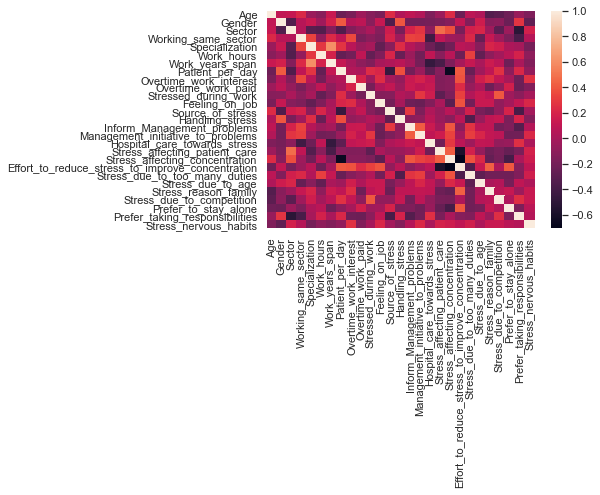

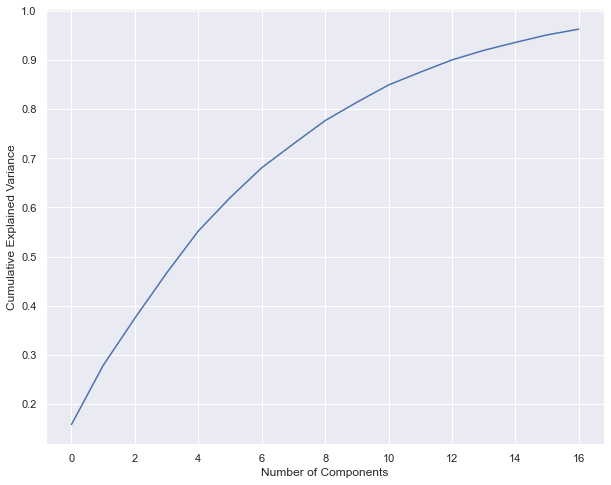

<AxesSubplot:>

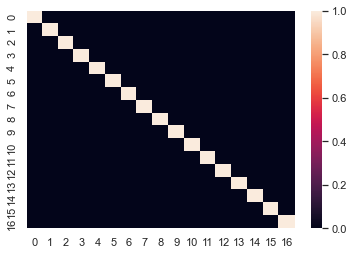

In [4]:

# 1.3 PCA

    # correlation matrix to see if we perform PCA

corr_graph = df.corr() # Heat map of correlation matrix
sns.heatmap(corr_graph, 
        xticklabels=corr_graph.columns,
        yticklabels=corr_graph.columns)


    # PCA using 96% variance 

scalerPCA = MinMaxScaler()
Xscaled = scalerPCA.fit_transform(df)
pca = PCA(n_components=0.96)  
pca.fit(Xscaled)
Xreduced = pca.transform(Xscaled)
df_red = pd.DataFrame(Xreduced)

print("Number of PCs: ",pca.n_components_)

    # Seeing the relation between the variance and the number of components
    # To select the right variance
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


corr_graph = df_red.corr() # Heat map of correlation matrix
sns.heatmap(corr_graph, 
        xticklabels=corr_graph.columns,
        yticklabels=corr_graph.columns)




In [5]:
# 2. K-Means Clustering FEATURE SELECTION 
# Requirements: numerical and normalized features

# Data preprocessing
print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_prep=df.copy(deep=True) 

display('Data Example:',HTML(df_prep.head(10).to_html()))

# Normalized all numerical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_prep.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_prep[col]=(df_prep[col]-df_prep[col].min())/(df_prep[col].max()-df_prep[col].min())



Column Datatypes:
 Age                                                   int64
Gender                                                int64
Sector                                                int64
Working_same_sector                                   int64
Specialization                                        int64
Work_hours                                            int64
Work_years_span                                       int64
Patient_per_day                                       int64
Overtime_work_interest                                int64
Overtime_work_paid                                    int64
Stressed_during_work                                  int64
Feeling_on_job                                        int64
Source_of_stress                                    float64
Handling_stress                                       int64
Inform_Management_problems                            int64
Management_initiative_to_problems                     int64
Hospital_care_towards

'Data Example:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
3,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
4,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
5,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
6,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1
7,1,2,2,2,9,1,2,4,1,2,1,2,1.0,5,2,3,2,2,2,2,1,1,2,1,1,1,1
8,1,2,2,2,9,1,2,4,1,2,1,2,1.0,5,2,3,2,2,2,2,1,1,2,1,1,1,1
9,1,2,2,2,9,1,2,4,1,2,1,2,1.0,5,2,3,2,2,2,2,1,1,2,1,1,1,1


Selected numerical columns:
 ['Age', 'Gender', 'Sector', 'Working_same_sector', 'Specialization', 'Work_hours', 'Work_years_span', 'Patient_per_day', 'Overtime_work_interest', 'Overtime_work_paid', 'Stressed_during_work', 'Feeling_on_job', 'Source_of_stress', 'Handling_stress', 'Inform_Management_problems', 'Management_initiative_to_problems', 'Hospital_care_towards_stress', 'Stress_affecting_patient_care', 'Stress_affecting_concentration', 'Effort_to_reduce_stress_to_improve_concentration', 'Stress_due_to_too_many_duties', 'Stress_due_to_age', 'Stress_reason_family', 'Stress_due_to_competition', 'Prefer_to_stay_alone', 'Prefer_taking_responsibilities', 'Stress_nervous_habits']


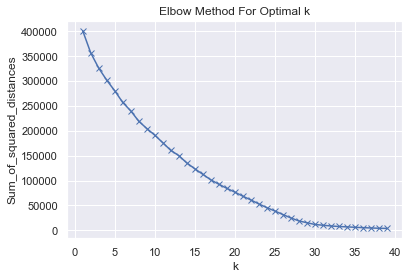

In [8]:
# 2.1. KMeans clustering 

# FEATURE SELECTION

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# 2.1.1 try different K value and find the best K for KMeans
    # Assumption: SSE is smaller, it is better

df_km=df_prep.copy(deep=True)    
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k, random_state=1, algorithm='full')
    km = km.fit(df_km)
    Sum_of_squared_distances.append(km.inertia_)
    
    # Plot K and SSE, observe which one is better
    # In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [12]:
# 2.1.2 K-Means with the optimal number of cluster K
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=15, random_state=1, algorithm='full')
kmeans.fit(df_km)
y_pred=kmeans.predict(df_km)


# Get the cluster labels and add it back to the original data
opt=kmeans.labels_
print(opt)
df_km['Cluster']=opt
display('Data:',HTML(df_km.tail(10).to_html()))
_clusters=df_km['Cluster'].unique()
print(_clusters)

counting=df_km['Cluster'].value_counts()

print("Number of physicians in each cluster: \n",counting)


# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(df_prep, opt)
print("silhouette_avg \n",silhouette_avg)



[1 1 1 ... 4 4 4]


'Data:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
99990,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99991,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99992,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99993,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99994,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99995,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99996,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99997,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99998,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
99999,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4


[ 1  5  8  7  4  9  6  2 11 10 13  0  3 12 14]
Number of physicians in each cluster: 
 4     13338
3      9991
7      9878
2      8959
11     6779
10     6743
5      6669
9      6662
6      6637
8      6633
12     4418
13     3354
1      3354
0      3354
14     3231
Name: Cluster, dtype: int64
silhouette_avg 
 0.48986559085025333


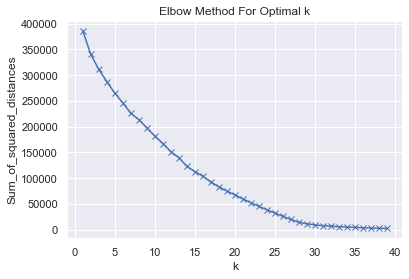

In [13]:
# 2.2. K-Means Clustering with FEATURE REDUCTION AND SELECTION - PCA 
# Requirements: numerical and normalized features -> PCA has normalized features

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# 3.2. Try different K value and find the best K for KMeans
    # Assumption: SSE is smaller, it is better

Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k, random_state=1, algorithm='full')
    km = km.fit(df_red)
    Sum_of_squared_distances.append(km.inertia_)
    
    # Plot K and SSE, observe which one is better
    # In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [10]:
# 2.2.3 K-Means clustering 

kmeans=KMeans(n_clusters=15, random_state=1, algorithm='full')
kmeans.fit(Xreduced)
y_pred=kmeans.predict(Xreduced)


# 3.4 Adding the column Cluster to our dataframe
    # Perform a visualization of the resulting dataframe after PCA
df_reduced = pd.DataFrame(Xreduced)
# print out and display dataframe as tables in HTML
display(HTML(df_reduced.head(3).to_html()))

# Perform a visualization of the original dataframe adding
# Last column contains the cluster number
df_pca_kmeans = df.copy(deep=True) 
labels=kmeans.labels_
df_pca_kmeans['Cluster']=kmeans.labels_
display(HTML(df_pca_kmeans.head(5).to_html()))
display(HTML(df_pca_kmeans.tail(5).to_html()))

print("Dimensions: ",df_pca_kmeans.shape)
print("Different Clusters: ", df_pca_kmeans['Cluster'].unique() )




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.560664,-0.69761,0.480465,-0.037387,0.464484,-0.427768,-0.590877,0.180585,0.182055,0.086677,-0.328862,0.414116,-0.043166,-0.319275,-0.200557,0.924671,-0.053152
1,-0.560664,-0.69761,0.480465,-0.037387,0.464484,-0.427768,-0.590877,0.180585,0.182055,0.086677,-0.328862,0.414116,-0.043166,-0.319275,-0.200557,0.924671,-0.053152
2,-0.560664,-0.69761,0.480465,-0.037387,0.464484,-0.427768,-0.590877,0.180585,0.182055,0.086677,-0.328862,0.414116,-0.043166,-0.319275,-0.200557,0.924671,-0.053152


,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2
3,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2
4,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2


,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
99995,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,13
99996,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,13
99997,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,13
99998,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,13
99999,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,13


Dimensions:  (100000, 28)
Different Clusters:  [ 2  1 11  8 10 13 12  9  5 14  3  4  0  6  7]


In [11]:

counting2=df_pca_kmeans['Cluster'].value_counts()

print("Number of physicians in each cluster: \n",counting2)


# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(df_red, kmeans.labels_)
print("silhouette_avg \n",silhouette_avg)

Number of physicians in each cluster: 
 5     10023
4     10023
13     9984
2      6708
8      6672
7      6669
1      6669
12     6662
10     6637
9      6637
6      6637
3      5569
14     4441
0      3354
11     3315
Name: Cluster, dtype: int64
silhouette_avg 
 0.5242766944426102


<ipython-input-18-b31f247ea232>:50: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen ,lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


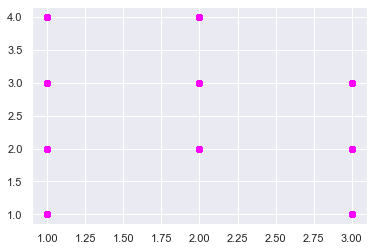

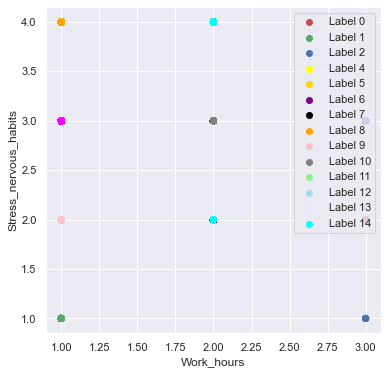

In [18]:
# 2.3 Performing some visualization of data

# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='gray');
lightgreen = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='lightblue');

lavender = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Work_hours'], df_pca_kmeans['Stress_nervous_habits'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen ,lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Work_hours')
plt.ylabel('Stress_nervous_habits')
plt.show()


<ipython-input-19-508f33f8c859>:43: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen ,lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


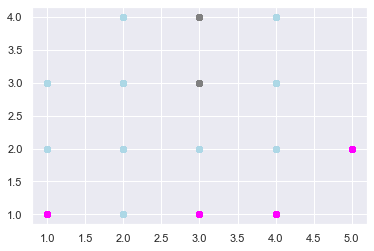

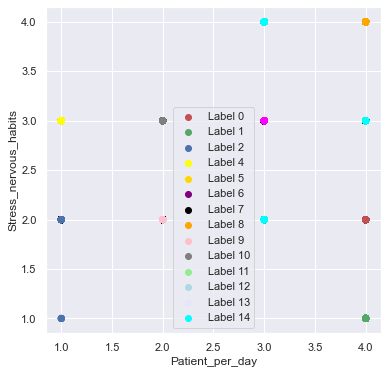

In [19]:
# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Gender'], color ='lightgreen');
lavender = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Gender'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Gender'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Gender'], color ='magenta'); 
lightblue = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='lightblue');
plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Patient_per_day'], df_pca_kmeans['Stress_nervous_habits'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen ,lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Patient_per_day')
plt.ylabel('Stress_nervous_habits')
plt.show()


<ipython-input-20-86ac1b2bc999>:44: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen , lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


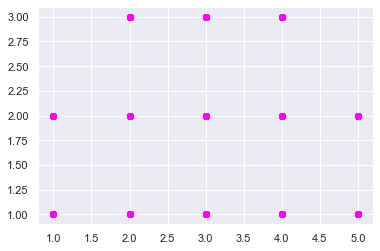

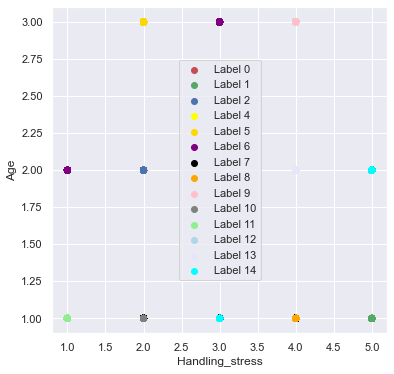

In [20]:

# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='lightblue');
lavender = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Handling_stress'], df_pca_kmeans['Age'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen , lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Handling_stress')
plt.ylabel('Age')
plt.show()



<ipython-input-21-5e9b62dcc309>:44: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen, lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


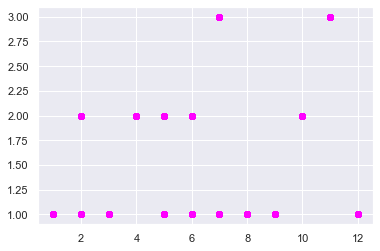

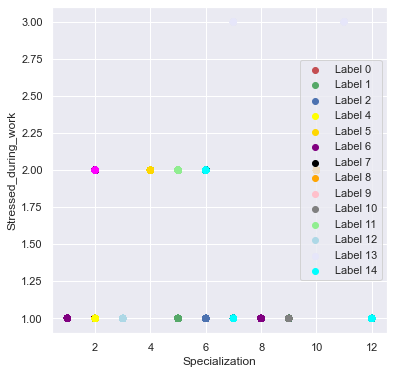

In [21]:
# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='lightblue');
lavender = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stressed_during_work'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen, lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Specialization')
plt.ylabel('Stressed_during_work')
plt.show()




<ipython-input-25-a8b8b87a42b2>:44: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen, lightblue ,lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


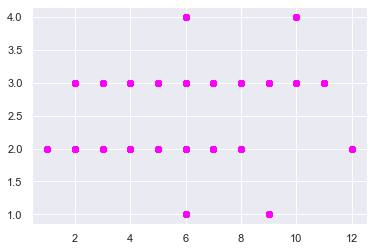

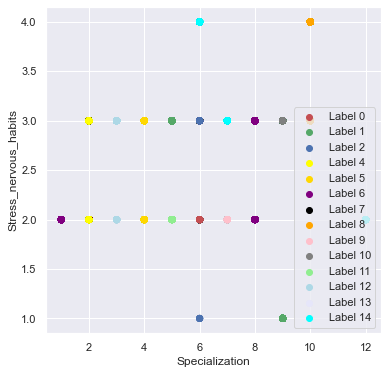

In [25]:


# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='lightblue');
lavender = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Specialization'], df_pca_kmeans['Stress_nervous_habits'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen, lightblue ,lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Specialization')
plt.ylabel('Stress_nervous_habits')
plt.show()




<ipython-input-22-ce44fb114de6>:44: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen ,lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


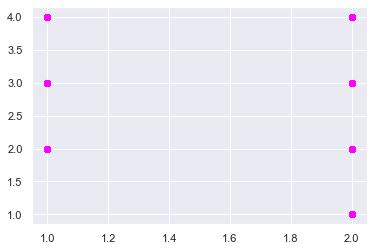

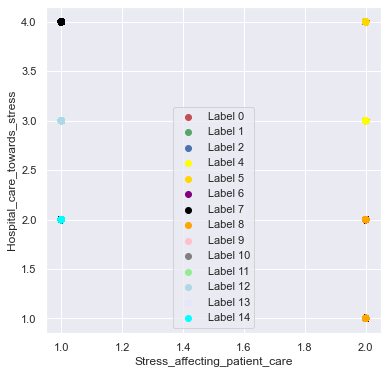

In [22]:

# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='lightblue');
lavender = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Stress_affecting_patient_care'], df_pca_kmeans['Hospital_care_towards_stress'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen ,lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Stress_affecting_patient_care')
plt.ylabel('Hospital_care_towards_stress')
plt.show()


<ipython-input-23-c3f1b4d8caac>:47: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen , lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


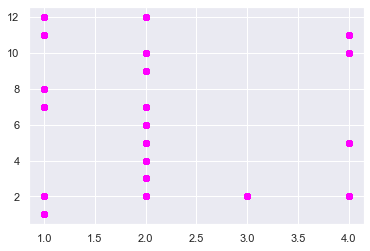

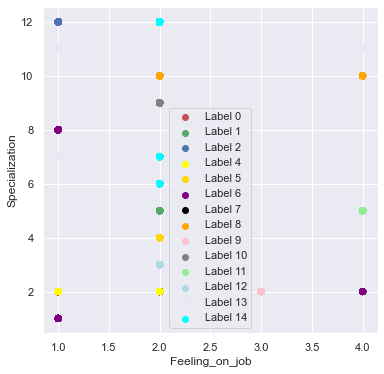

In [23]:

#labels =cluster.labels_


# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'

# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='yellow');  
gold = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='gold'); 
purple = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='lightblue');
lavender = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Specialization'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, gold, purple, black , orange, pink, gray, lightgreen , lightblue, lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Feeling_on_job')
plt.ylabel('Specialization')
plt.show()



<ipython-input-24-32b4e1b6e37b>:43: UserWarning: Legend does not support 39 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((r, g, b, k, yellow, brown, purple, black , orange, pink, gray, lightgreen ,lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))


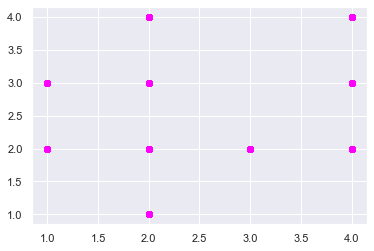

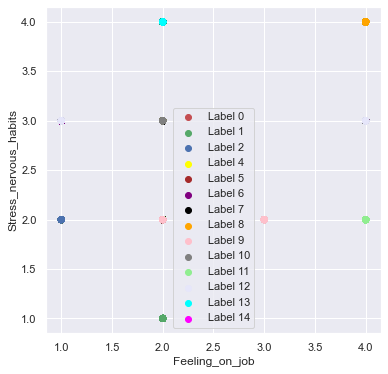

In [24]:

# Visualizing the clustering 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'gold'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'
# Building the colour vector for each data point 
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
    
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='r'); 
g = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='g'); 
b = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='b'); 
yellow = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='yellow');  
brown = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='brown'); 
purple = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='purple'); 
black = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='black'); 
orange = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='orange'); 
pink = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='pink'); 
gray = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='gray'); 
lightgreen = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='lightgreen');
lightblue = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='lightblue');
lavender = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='lavender'); 
cyan = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='cyan'); 
magenta = plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'], color ='magenta'); 

plt.figure(figsize =(6, 6)) 
plt.scatter(df_pca_kmeans['Feeling_on_job'], df_pca_kmeans['Stress_nervous_habits'],  
            c = cvec) 
# Building the legend 
plt.legend((r, g, b, k, yellow, brown, purple, black , orange, pink, gray, lightgreen ,lavender, cyan, magenta), ('Label 0', 'Label 1', 'Label 2',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14'))   
plt.xlabel('Feeling_on_job')
plt.ylabel('Stress_nervous_habits')
plt.show()




In [30]:
# 3. DBSCAN - Density-based Clustering using PCA
 
from sklearn.cluster import DBSCAN

df_pca_dbscan=df_red.copy(deep=True) 
display('Data:',HTML(df_pca_dbscan.tail(10).to_html()))



'Data:'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
99990,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99991,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99992,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99993,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99994,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99995,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99996,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99997,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99998,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713
99999,1.449731,0.331071,0.500806,-0.39559,-0.041992,-0.338202,0.43818,-0.195816,0.365134,0.391348,-0.284732,-0.221725,-0.319192,0.08234,0.264526,0.168548,0.09713


In [25]:
# Different DBSCAN trials
db_default = DBSCAN(eps = 0.2, min_samples = 3).fit(df_pca_dbscan) 
labels = db_default.labels_ 
df_pca_dbscan = df.copy(deep=True) 
df_pca_dbscan['Cluster']=labels


db_pca_dbscan = DBSCAN(eps = 0.5, min_samples = 2500, algorithm='brute').fit(df_pca_dbscan) 
df_pca_dbscan['Cluster']=db_pca_dbscan.labels_
counting=df_pca_dbscan['Cluster'].value_counts()
print('0.5 / 2800 / brute', counting)



db_pca_dbscan = DBSCAN(eps = 0.7, min_samples = 2300, algorithm='ball_tree').fit(df_pca_dbscan) 
df_pca_dbscan['Cluster']=db_pca_dbscan.labels_
counting=df_pca_dbscan['Cluster'].value_counts()
print('0.7 / 2300 / ball tree', counting)



'Data after clustering:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
99990,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99991,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99992,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99993,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99994,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99995,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99996,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99997,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99998,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68
99999,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,68


0.5 / 2800 / brute -1     24303
 5      3354
 2      3354
 0      3318
 18     3315
 3      3290
 21     3283
 17     3279
 8      3251
 19     3231
 22     3212
 9      3212
 10     3199
 12     3192
 11     3173
 20     3167
 7      3160
 4      3121
 16     3101
 13     3082
 1      3068
 14     3047
 23     3027
 15     2637
 6      2624
Name: Cluster, dtype: int64
0.7 / 2300 / ball tree -1     21960
 5      3354
 2      3354
 0      3318
 19     3315
 3      3290
 22     3283
 18     3279
 8      3251
 20     3231
 23     3212
 9      3212
 10     3199
 12     3192
 11     3173
 21     3167
 7      3160
 4      3121
 17     3101
 14     3082
 1      3068
 15     3047
 24     3027
 16     2637
 6      2624
 13     2343
Name: Cluster, dtype: int64


In [35]:
# Final model chosen

db_pca_dbscan = DBSCAN(eps = 0.7, min_samples = 2000, algorithm='ball_tree').fit(df_pca_dbscan) 
df_pca_dbscan = df.copy(deep=True) 

labels =db_pca_dbscan.labels_
df_pca_dbscan['Cluster']=db_pca_dbscan.labels_
counting=df_pca_dbscan['Cluster'].value_counts()
print('0.7 / 2000 / ball tree', counting)
display('Data after clustering:',HTML(df_pca_dbscan.tail(10).to_html()))



0.7 / 2000 / ball tree -1     12419
 11     3354
 2      3354
 4      3354
 5      3354
 1      3322
 0      3318
 23     3315
 14     3315
 3      3290
 26     3283
 22     3279
 10     3251
 24     3231
 27     3212
 28     3199
 12     3199
 15     3192
 25     3167
 9      3160
 18     3121
 21     3101
 17     3082
 19     2637
 6      2624
 16     2343
 8      2215
 20     2184
 13     2103
 7      2022
Name: Cluster, dtype: int64


'Data after clustering:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
99990,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99991,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99992,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99993,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99994,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99995,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99996,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99997,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99998,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1
99999,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,-1


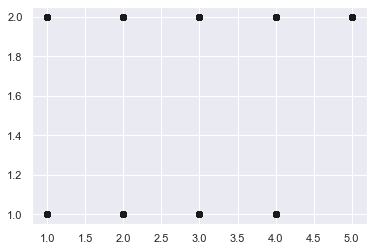

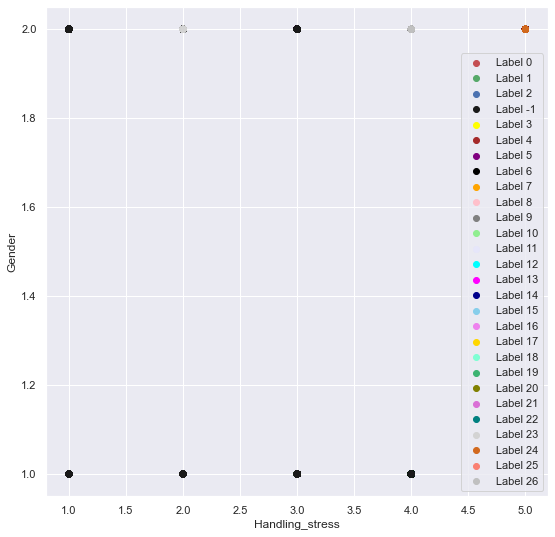

In [27]:
# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'brown'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'
colours[15] = 'darkblue'
colours[16] = 'skyblue'
colours[17] = 'violet'
colours[18] = 'gold'
colours[19] = 'aquamarine'
colours[20] = 'mediumseagreen'
colours[21] = 'olive'
colours[22] = 'orchid'
colours[23] = 'teal'
colours[24] = 'lightgray'
colours[25] = 'chocolate'
colours[26] = 'salmon'
colours[27] = 'silver'

colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='r'); 
g = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='g'); 
b = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='b'); 
yellow = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='yellow');  
brown = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='brown'); 
purple = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='purple'); 
black = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='black'); 
orange = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='orange'); 
pink = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='pink'); 
gray = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='gray'); 
lightgreen = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='lightgreen');
lavender = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='lavender'); 
cyan = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='cyan'); 
magenta = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='magenta'); 
darkblue = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='darkblue'); 
skyblue = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='skyblue'); 
violet = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='violet'); 
gold = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='gold'); 
aquamarine = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='aquamarine'); 
mediumseagreen = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='mediumseagreen'); 
olive = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='olive'); 
orchid = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='orchid'); 
teal = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='teal'); 
lightgray = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='lightgray'); 
chocolate = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='chocolate'); 
salmon = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='salmon'); 
silver = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='silver'); 
k = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='k'); 


# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], c = cvec)   
# Building the legend 
plt.legend((r, g, b, k, yellow, brown, purple, black , orange, pink, gray , lightgreen ,lavender, cyan, magenta, darkblue,skyblue, violet , gold, aquamarine , mediumseagreen, olive, orchid, teal, lightgray, chocolate, salmon, silver), ('Label 0', 'Label 1', 'Label 2', 'Label -1',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14', 'Label 15', 'Label 16', 'Label 17',  'Label 18', 'Label 19', 'Label 20', 'Label 21',  'Label 22', 'Label 23', 'Label 24', 'Label 25', 'Label 26', 'Label 27' ))   
plt.xlabel('Handling_stress')
plt.ylabel('Gender')
plt.show()



In [28]:
 # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
silhouette_avg = silhouette_score(df, labels)
print("silhouette_avg \n",silhouette_avg)



silhouette_avg 
 0.7585392028723742


In [36]:
# 4.KNN after performing DBSCAN

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# preprocess label, since KNN requires label encoding
from sklearn import preprocessing


display(HTML(df_pca_dbscan.head(3).to_html()))

y = df_pca_dbscan['Stress_nervous_habits'] # define label as nominal values
le = preprocessing.LabelEncoder() #LabelEncoder for labels! Very important
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers 

df_pca_dbscan['Stress_nervous_habits'] = y_encoded
x = df_pca_dbscan.drop('Stress_nervous_habits',1)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2)


# build and eval models
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


for k in range(1, 30, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    precision=precision_score(y_test, y_pred, average='micro')
    recall=recall_score(y_test, y_pred, average='micro')
    F1 = 2 * (precision * recall) / (precision + recall)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', 
          precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'), ', F1-score: ', F1)
    


,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,-1
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,-1
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,-1


K = 1 , Accuracy:  0.9677 , Precision:  0.9677 , Recall:  0.9677 , F1-score:  0.9677
K = 3 , Accuracy:  0.9979 , Precision:  0.9979 , Recall:  0.9979 , F1-score:  0.9979
K = 5 , Accuracy:  0.9979 , Precision:  0.9979 , Recall:  0.9979 , F1-score:  0.9979
K = 7 , Accuracy:  0.9979 , Precision:  0.9979 , Recall:  0.9979 , F1-score:  0.9979
K = 9 , Accuracy:  0.9979 , Precision:  0.9979 , Recall:  0.9979 , F1-score:  0.9979
K = 11 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  0.9978 , F1-score:  0.9978
K = 13 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  0.9978 , F1-score:  0.9978
K = 15 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  0.9978 , F1-score:  0.9978
K = 17 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  0.9978 , F1-score:  0.9978
K = 19 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  0.9978 , F1-score:  0.9978
K = 21 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  0.9978 , F1-score:  0.9978
K = 23 , Accuracy:  0.9978 , Precision:  0.9978 , Recall:  

In [28]:
# 5. KNN after performing K-MEANS

display(HTML(df_pca_kmeans.head(3).to_html()))

y = df_pca_kmeans['Stress_nervous_habits'] # define label as nominal values
le = preprocessing.LabelEncoder() #LabelEncoder for labels! Very important
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers 

df_pca_kmeans['Stress_nervous_habits'] = y_encoded
x = df_pca_kmeans.drop('Stress_nervous_habits',1)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2)


# build and eval models
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


for k in range(1, 30, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    precision=precision_score(y_test, y_pred, average='micro')
    recall=recall_score(y_test, y_pred, average='micro')
    F1 = 2 * (precision * recall) / (precision + recall)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'), ', F1-score: ', F1)
    


,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Stress_nervous_habits,Cluster
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,2


K = 1 , Accuracy:  0.99715 , Precision:  0.99715 , Recall:  0.99715 , F1-score:  0.99715
K = 3 , Accuracy:  0.99715 , Precision:  0.99715 , Recall:  0.99715 , F1-score:  0.99715
K = 5 , Accuracy:  0.99715 , Precision:  0.99715 , Recall:  0.99715 , F1-score:  0.99715
K = 7 , Accuracy:  0.99715 , Precision:  0.99715 , Recall:  0.99715 , F1-score:  0.99715
K = 9 , Accuracy:  0.99715 , Precision:  0.99715 , Recall:  0.99715 , F1-score:  0.99715
K = 11 , Accuracy:  0.99705 , Precision:  0.99705 , Recall:  0.99705 , F1-score:  0.99705
K = 13 , Accuracy:  0.99705 , Precision:  0.99705 , Recall:  0.99705 , F1-score:  0.99705
K = 15 , Accuracy:  0.99705 , Precision:  0.99705 , Recall:  0.99705 , F1-score:  0.99705
K = 17 , Accuracy:  0.99705 , Precision:  0.99705 , Recall:  0.99705 , F1-score:  0.99705
K = 19 , Accuracy:  0.99705 , Precision:  0.99705 , Recall:  0.99705 , F1-score:  0.99705
K = 21 , Accuracy:  0.99705 , Precision:  0.99705 , Recall:  0.99705 , F1-score:  0.99705
K = 23 , Accura